In [ ]:
'''>>>>> start CodeP3.1.2F23
    V.P. Carey ME249, Fall 2023

Intro to Neural Network Modeling
Keras model for PV power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

#create input data array
xraw = []

#Part 1 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
xraw = [[-10.0, 350, 4.464],
  [-10.0, 650, 4.464],
  [-10.0, 950, 4.464],
  [-10.0, 1250, 4.464],
  [10.0, 350, 4.464],
  [10.0, 650, 4.464],
  [10.0, 950, 4.464],
  [10.0, 1250, 4.464],
  [30.0, 350, 4.464],
  [30.0, 650, 4.464],
  [30.0, 950, 4.464],
  [30.0, 1250, 4.464],
  [-10.0, 350, 6.696],
  [-10.0, 650, 6.696],
  [-10.0, 950, 6.696],
  [-10.0, 1250, 6.696],
  [10.0, 350, 6.696],
  [10.0, 650, 6.696],
  [10.0, 950, 6.696],
  [10.0, 1250, 6.696],
  [30.0, 350, 6.696],
  [30.0, 650, 6.696],
  [30.0, 950, 6.696],
  [30.0, 1250, 6.696],
  [-10.0, 350, 8.928],
  [-10.0, 650, 8.928],
  [-10.0, 950, 8.928],
  [-10.0, 1250, 8.928],
  [10.0, 350, 8.928],
  [10.0, 650, 8.928],
  [10.0, 950, 8.928],
  [10.0, 1250, 8.928],
  [30.0, 350, 8.928],
  [30.0, 650, 8.928],
  [30.0, 950, 8.928],
  [30.0, 1250, 8.928]]

xraw= np.array(xraw)
# print (xraw)
# print (xraw)

#create output data array
yraw = []

#Part 1 output data: VL (V) and Power out Wd (W)
yraw = [[18.9, 80.3],
 [23.5, 124.6],
 [24.8, 138.6],
 [25.6, 146.9],
 [19.2, 83.1],
 [25.0, 140.5],
 [26.5, 157.6],
 [27.3, 167.5],
 [19.4, 84.7],
 [26.4, 156.7],
 [28.1, 177.7],
 [29.0, 189.4],
 [22.4, 75.2],
 [24.8, 92.2],
 [25.8, 99.7],
 [26.4, 104.6],
 [23.6, 83.7],
 [26.5, 104.9],
 [27.6, 113.8],
 [28.3, 119.6],
 [24.8, 92.0],
 [28.1, 118.2],
 [29.3, 128.8],
 [30.1, 135.5],
 [23.5, 62.2],
 [25.4, 72.5],
 [26.3, 77.6],
 [26.9, 81.1],
 [25.0, 70.3],
 [27.1, 82.7],
 [28.1, 88.7],
 [28.7, 92.8],
 [26.5, 78.6],
 [28.8, 93.5],
 [29.9, 100.5],
 [30.6, 105.2]]

yraw = np.array(yraw)
# print (ydata)
print (yraw)

# Calculate the median for each column
median_values_x = np.median(np.array(xraw), axis=0)
Tamed = median_values_x[0] #
IDmed = median_values_x[1] #
RLmed = median_values_x[2] #

median_values_y = np.median(np.array(yraw), axis=0)
VLmed = median_values_y[0]
Wdmed = median_values_y[1]

print("Median values for each column:", median_values_x, median_values_y)

xnorm = (xraw/median_values_x)
ynorm = (yraw/median_values_y)

print("Normalized xdata: \n", xnorm)
print("\n")
print("Normalized ydata: \n",ynorm)

[[ 18.9  80.3]
 [ 23.5 124.6]
 [ 24.8 138.6]
 [ 25.6 146.9]
 [ 19.2  83.1]
 [ 25.  140.5]
 [ 26.5 157.6]
 [ 27.3 167.5]
 [ 19.4  84.7]
 [ 26.4 156.7]
 [ 28.1 177.7]
 [ 29.  189.4]
 [ 22.4  75.2]
 [ 24.8  92.2]
 [ 25.8  99.7]
 [ 26.4 104.6]
 [ 23.6  83.7]
 [ 26.5 104.9]
 [ 27.6 113.8]
 [ 28.3 119.6]
 [ 24.8  92. ]
 [ 28.1 118.2]
 [ 29.3 128.8]
 [ 30.1 135.5]
 [ 23.5  62.2]
 [ 25.4  72.5]
 [ 26.3  77.6]
 [ 26.9  81.1]
 [ 25.   70.3]
 [ 27.1  82.7]
 [ 28.1  88.7]
 [ 28.7  92.8]
 [ 26.5  78.6]
 [ 28.8  93.5]
 [ 29.9 100.5]
 [ 30.6 105.2]]
Median values for each column: [ 10.    800.      6.696] [ 26.45 100.1 ]
Normalized xdata: 
 [[-1.          0.4375      0.66666667]
 [-1.          0.8125      0.66666667]
 [-1.          1.1875      0.66666667]
 [-1.          1.5625      0.66666667]
 [ 1.          0.4375      0.66666667]
 [ 1.          0.8125      0.66666667]
 [ 1.          1.1875      0.66666667]
 [ 1.          1.5625      0.66666667]
 [ 3.          0.4375      0.66666667]
 [ 3.          

In [ ]:
# from sklearn.model_selection import train_test_split

# # Set the random seed for reproducibility
# random_seed = 42

# # Split the data into 2/3 for training and 1/3 for testing
# xtrain, xtest, ytrain, ytest = train_test_split(xnorm, ynorm, test_size=1/3, random_state=random_seed)

# # Print the results
# print("Training data:")
# print("xtrain:", xtrain)
# print("ytrain:", ytrain)

# print("\nTesting data:")
# print("xtest:", xtest)
# print("ytest:", ytest)

### Build Training and Validation Set
# seed the pseudorandom number generator
from random import random
from random import seed
from random import sample
# seed random number generator
seed(1)

# Calculate the number of indices to select (approximately 1/3 of the length)
num_indices_to_select = len(xnorm) // 3

# Randomly select indices
selected_indices = sample(range(0,len(xnorm)), num_indices_to_select)

xval = []
xarray = []
yval = []
yarray = []
for i in range(len(xnorm)):
    if i in selected_indices:
        xval.append(xnorm[i][:])
        yval.append(ynorm[i][:])
    else:
        xarray.append(xnorm[i][:])
        yarray.append(ynorm[i][:])

xval = np.array(xval)
xarray = np.array(xarray)
yval = np.array(yval)
yarray = np.array(yarray)

In [ ]:
# define neural network model

#As seen below, we have created four dense layers.
#A dense layer is a layer in neural network that’s fully connected.
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case.
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(6, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(12, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(6, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation.
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks.
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.0015)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [ ]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training.
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again.
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs.
#During model training, if all the batches of data are seen by the model once,
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss',
    mode='min',
    patience = 80,
    restore_best_weights = True,
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss',
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=1200,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model')

Epoch 1/1200
1/1 [==============================] - 1s 1s/step - loss: 0.0240
Epoch 2/1200
1/1 [==============================] - 0s 17ms/step - loss: 0.0196
Epoch 3/1200
1/1 [==============================] - 0s 19ms/step - loss: 0.0155
Epoch 4/1200
1/1 [==============================] - 0s 16ms/step - loss: 0.0170
Epoch 5/1200
1/1 [==============================] - 0s 20ms/step - loss: 0.0157
Epoch 6/1200
1/1 [==============================] - 0s 26ms/step - loss: 0.0170
Epoch 7/1200
1/1 [==============================] - 0s 23ms/step - loss: 0.0150
Epoch 8/1200
1/1 [==============================] - 0s 24ms/step - loss: 0.0142
Epoch 9/1200
1/1 [==============================] - 0s 14ms/step - loss: 0.0145
Epoch 10/1200
1/1 [==============================] - 0s 13ms/step - loss: 0.0148
Epoch 11/1200
1/1 [==============================] - 0s 15ms/step - loss: 0.0144
Epoch 12/1200
1/1 [==============================] - 0s 20ms/step - loss: 0.0134
Epoch 13/1200
1/1 [====================

1/1 [==============================] - 0s 65ms/step


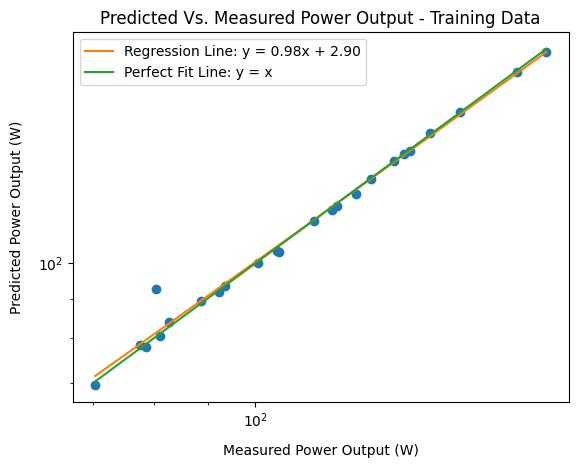

Mean Absolute Error between Predicted and Measured Power Output: 1.2398763656616232

Mean Absolute Relative Error between Predicted and Measured Power Output: 0.012999122965983581



In [ ]:


# # This line of code can be used to reconstruct the saved model.

# recon_model = keras.models.load_model("best_model")

# # the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# # See the previous project for code to do the comparisons.


import matplotlib.pyplot as plt

# Use model.predict to get all outputs at once
outputs = model.predict(xarray)

# Regression Line
m, b = np.polyfit(yarray[:, 1]*Wdmed, outputs[:, 1]*Wdmed, 1)
regress_input = np.linspace(np.min(yarray[:, 1])*Wdmed, np.max(yarray[:, 1])*Wdmed, 50)

# Create a Log-Log plot
plt.loglog(yarray[:, 1]*Wdmed, outputs[:, 1]*Wdmed, marker = 'o', linestyle = '')
plt.loglog(regress_input, m*(regress_input) + b, label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
plt.loglog(regress_input, regress_input, label=f'Perfect Fit Line: y = x')

plt.title('Predicted Vs. Measured Power Output - Training Data')
plt.xlabel('Measured Power Output (W)', labelpad = 10)
plt.ylabel('Predicted Power Output (W)', labelpad = 10)
plt.legend()

plt.show()

### Output Mean Abs Error Value ###
diff = np.abs((yarray[:, 1]*Wdmed) - (outputs[:, 1]*Wdmed))
mae = np.mean(diff)
print("Mean Absolute Error between Predicted and Measured Power Output: " + str(mae) + "\n")

### Output Mean Abs Relative Error Value ###
diff = np.abs(((yarray[:, 1]*Wdmed) - (outputs[:, 1]*Wdmed)) / (yarray[:, 1]*Wdmed))
mae = np.mean(diff)
print("Mean Absolute Relative Error between Predicted and Measured Power Output: " + str(mae) + "\n")

1/1 [==============================] - 0s 22ms/step


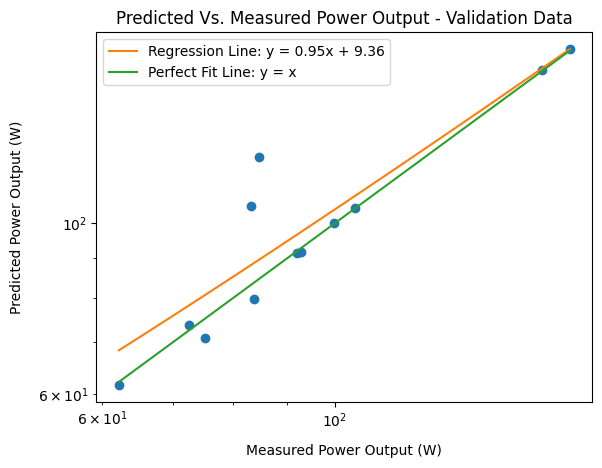

Mean Absolute Error between Predicted and Measured Power Output: 6.053789011637369

Mean Absolute Relative Error between Predicted and Measured Power Output: 0.0720927330403467



In [ ]:
# Use model.predict to get all outputs at once
outputs = model.predict(xval)

# Regression Line
m, b = np.polyfit(yval[:, 1]*Wdmed, outputs[:, 1]*Wdmed, 1)
regress_input = np.linspace(np.min(yval[:, 1])*Wdmed, np.max(yval[:, 1])*Wdmed, 50)

# Create a Log-Log plot
plt.loglog(yval[:, 1]*Wdmed, outputs[:, 1]*Wdmed, marker = 'o', linestyle = '')
plt.loglog(regress_input, m*(regress_input) + b, label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
plt.loglog(regress_input, regress_input, label=f'Perfect Fit Line: y = x')

plt.title('Predicted Vs. Measured Power Output - Validation Data')
plt.xlabel('Measured Power Output (W)', labelpad = 10)
plt.ylabel('Predicted Power Output (W)', labelpad = 10)
plt.legend()

plt.show()

### Output Mean Abs Error Value ###
diff = np.abs((yval[:, 1]*Wdmed) - (outputs[:, 1]*Wdmed))
mae = np.mean(diff)
print("Mean Absolute Error between Predicted and Measured Power Output: " + str(mae) + "\n")

### Output Mean Abs Relative Error Value ###
diff = np.abs(((yval[:, 1]*Wdmed) - (outputs[:, 1]*Wdmed)) / (yval[:, 1]*Wdmed))
mae = np.mean(diff)
print("Mean Absolute Relative Error between Predicted and Measured Power Output: " + str(mae) + "\n")

In [ ]:
# part g

#Input HI FLUX DATA: Air temp (degC), ID (W/sqm), load resistance (ohms)

xrawH = [[-10.0, 1550, 4.464],
  [-10.0, 1850, 4.464],
  [10.0, 1550, 4.464],
  [10.0, 1850, 4.464],
  [30.0, 1550, 4.464],
  [30.0, 1850, 4.464],
  [-10.0, 1550, 6.696],
  [-10.0, 1850, 6.696],
  [10.0, 1550, 6.695],
  [10.0, 1850, 6.696],
  [30.0, 1550, 6.696],
  [30.0, 1850, 6.696],
  [-10.0, 1550, 8.928],
  [-10.0, 1850, 8.928],
  [10.0, 1550, 8.928],
  [10.0, 1850, 8.928],
  [30.0, 1550, 8.928],
  [30.0, 1850, 8.928]]

#Part 1 output HI FLUX DATA: load voltage (V) and Power out (W)
yrawH = [[26.1, 152.8],
 [26.5, 172.7],
 [27.9, 191.4],
 [28.3, 198.0],
 [29.6, 217.8],
 [30.1, 224.4],
 [26.9, 118.8],
 [27.2, 122.1],
 [28.8, 136.4],
 [29.1, 139.6],
 [30.6, 154.0],
 [31.0, 158.4],
 [27.3, 92.4],
 [27.6, 94.6],
 [29.2, 105.6],
 [29.6, 107.8],
 [31.1, 119.9],
 [31.5, 123.2]]

#Convert to arrays
xrawH = np.array(xrawH)
yrawH = np.array(yrawH)

# Calculate the median for each column
median_values_xH = np.median(np.array(xrawH), axis=0)
#Tamed = median_values_xH[0] #
#IDmed = median_values_xH[1] #
#RLmed = median_values_xH[2] #

median_values_yH = np.median(np.array(yrawH), axis=0)
#VLmed = median_values_yH[0]
WdmedH = median_values_yH[1]

print("Median values for each column:", median_values_xH, median_values_yH)

xnormH = (xrawH/median_values_xH)
ynormH = (yrawH/median_values_yH)

print("Normalized xdata: \n", xnormH)
print("\n")
print("Normalized ydata: \n",ynormH)

Median values for each column: [  10.    1700.       6.696] [ 28.95 138.  ]
Normalized xdata: 
 [[-1.          0.91176471  0.66666667]
 [-1.          1.08823529  0.66666667]
 [ 1.          0.91176471  0.66666667]
 [ 1.          1.08823529  0.66666667]
 [ 3.          0.91176471  0.66666667]
 [ 3.          1.08823529  0.66666667]
 [-1.          0.91176471  1.        ]
 [-1.          1.08823529  1.        ]
 [ 1.          0.91176471  0.99985066]
 [ 1.          1.08823529  1.        ]
 [ 3.          0.91176471  1.        ]
 [ 3.          1.08823529  1.        ]
 [-1.          0.91176471  1.33333333]
 [-1.          1.08823529  1.33333333]
 [ 1.          0.91176471  1.33333333]
 [ 1.          1.08823529  1.33333333]
 [ 3.          0.91176471  1.33333333]
 [ 3.          1.08823529  1.33333333]]


Normalized ydata: 
 [[0.9015544  1.10724638]
 [0.91537133 1.25144928]
 [0.96373057 1.38695652]
 [0.9775475  1.43478261]
 [1.0224525  1.57826087]
 [1.03972366 1.62608696]
 [0.92918826 0.86086957]
 [0.

1/1 [==============================] - 0s 22ms/step


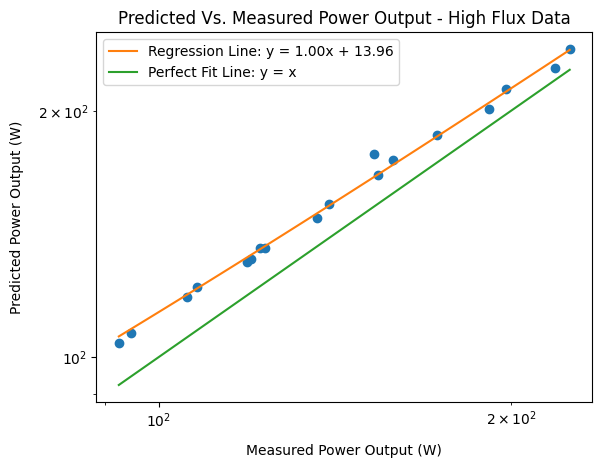

Mean Absolute Error between Predicted and Measured Power Output: 13.289517805311416

Mean Absolute Relative Error between Predicted and Measured Power Output: 0.09731114350040458



In [ ]:
import matplotlib.pyplot as plt

# Use model.predict to get all outputs at once
outputsH = model.predict(xnormH)

# Regression Line
m, b = np.polyfit(ynormH[:, 1]*WdmedH, outputsH[:, 1]*WdmedH, 1)
regress_input = np.linspace(np.min(ynormH[:, 1])*WdmedH, np.max(ynormH[:, 1])*WdmedH, 50)

# Create a Log-Log plot
plt.loglog(ynormH[:, 1]*WdmedH, outputsH[:, 1]*WdmedH, marker = 'o', linestyle = '')
plt.loglog(regress_input, m*(regress_input) + b, label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
plt.loglog(regress_input, regress_input, label=f'Perfect Fit Line: y = x')

plt.title('Predicted Vs. Measured Power Output - High Flux Data')
plt.xlabel('Measured Power Output (W)', labelpad = 10)
plt.ylabel('Predicted Power Output (W)', labelpad = 10)
plt.legend()

plt.show()

### Output Mean Abs Error Value ###
diff = np.abs((ynormH[:, 1]*WdmedH) - (outputsH[:, 1]*WdmedH))
mae = np.mean(diff)
print("Mean Absolute Error between Predicted and Measured Power Output: " + str(mae) + "\n")

### Output Mean Abs Relative Error Value ###
diff = np.abs(((ynormH[:, 1]*Wdmed) - (outputsH[:, 1]*Wdmed)) / (ynormH[:, 1]*Wdmed))
mae = np.mean(diff)
print("Mean Absolute Relative Error between Predicted and Measured Power Output: " + str(mae) + "\n")

313/313 [==============================] - 1s 2ms/step


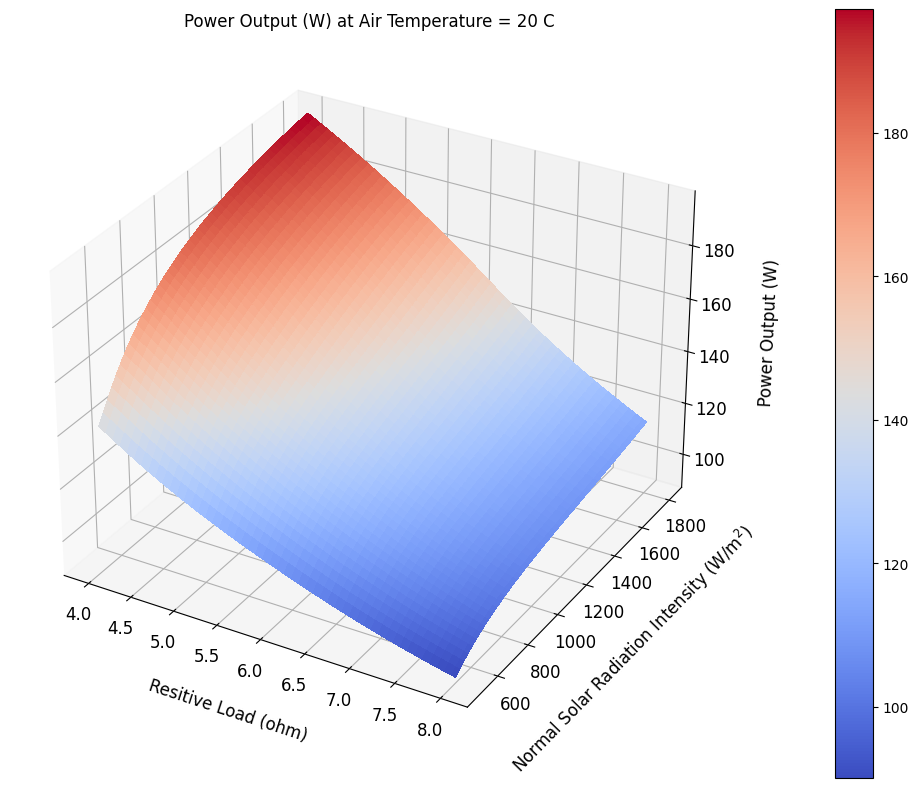

In [ ]:
### BUILD SURFACE PLOT ###
import matplotlib.cm as cm

# Build Test Arrays
test_Ta = 20/Tamed
test_ID = np.linspace(500/IDmed, 1800/IDmed, 100)
test_RL = np.linspace(4/RLmed, 8/RLmed, 100)

# Create Meshgrid
TEST_ID, TEST_RL = np.meshgrid(test_ID, test_RL)

# Create a 3D array of shape (num_rows, num_cols, 3) for the input data
input_data = np.stack((np.full_like(TEST_RL, test_Ta), TEST_ID, TEST_RL), axis=-1)

# Reshape the input data to have (num_rows * num_cols, 3)
input_data = input_data.reshape(-1, 3)

# Use model.predict to get all outputs at once
outputs = model.predict(input_data)

# Reshape the outputs to match the original shape
POWER = (outputs[:, 1].reshape(TEST_RL.shape))

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(TEST_RL*RLmed, TEST_ID*IDmed, POWER*Wdmed, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.view_init(elev=10, azim=290)  # Adjust 'elev' for elevation and 'azim' for azimuth angles
fig.colorbar(surf, ax=ax, pad = 0.11)

ax.set_xlabel('Resitive Load (ohm)', labelpad = 15, fontsize=12)
ax.set_ylabel('Normal Solar Radiation Intensity (W/m$^2$)', labelpad = 15, fontsize=12)
ax.set_zlabel('Power Output (W)', labelpad = 15, fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='z', labelsize=12)
plt.title('Power Output (W) at Air Temperature = 20 C')
#ax.set_xlim(200, 1000 )
#ax.set_ylim(200, 3000)

plt.tight_layout()
plt.show()
